In [52]:
using MIToS
using MIToS.MSA
using MIToS.Information
using StatsBase
using Plots
using LinearAlgebra
using Distances
using Clustering
using PairwiseListMatrices
using Statistics
using GraphRecipes
using DataFrames
using StatsPlots 

In [53]:
# Truncate IJulia outputs at:
ENV["LINES"]   = 20 
ENV["COLUMNS"] = 600;

In [54]:
fasta_file = "seqgen_aa1k.fasta"
msa = read(fasta_file, FASTA, generatemapping=true, useidcoordinates=true)
println("This MSA has ", nsequences(msa), " sequences...")
#fig = plotmsa(msa; colorscheme = :tableau_blue_green)

This MSA has 100 sequences...


In [55]:
#msa = msa[:,556:1000]

In [56]:
coverage(msa)

100×1 Named Matrix{Float64}
Seq ╲ Function │ coverage
───────────────┼─────────
Taxon91        │      1.0
Taxon29        │      1.0
Taxon50        │      1.0
Taxon68        │      1.0
Taxon9         │      1.0
Taxon81        │      1.0
Taxon47        │      1.0
⋮                       ⋮
Taxon48        │      1.0
Taxon5         │      1.0
Taxon97        │      1.0
Taxon41        │      1.0
Taxon44        │      1.0
Taxon93        │      1.0
Taxon96        │      1.0

In [57]:
columngapfraction(msa)

1×1000 Named Matrix{Float64}
Function ╲ Col │    1     2     3     4     5     6     7     8     9    10    11    12    13    14    15    16    17    18    19    20    21    22    23    24    25    26    27    28    29    30    31    32    33    34    35    36    37    38    39    40    41    42    43    44    45    46    47    48  …   953   954   955   956   957   958   959   960   961   962   963   964   965   966   967   968   969   970   971   972   973   974   975   976   977   978   979   980   981   982   983   984   985   986   987   988   989   990   991   992   993   994   995   996   997   998   999  1000
───────────────┼────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────

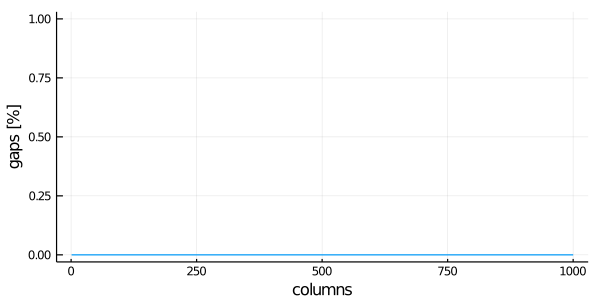

In [58]:
gr(size=(600,300))

plot(   1:ncolumns(msa), # x is a range from 1 to the number of columns
        vec(columngapfraction(msa)) .* 100.0, # y is a Vector{Float64} with the percentage of gaps of each column
        linetype = :line,
        ylabel = "gaps [%]",
        xlabel = "columns",
        legend=false)

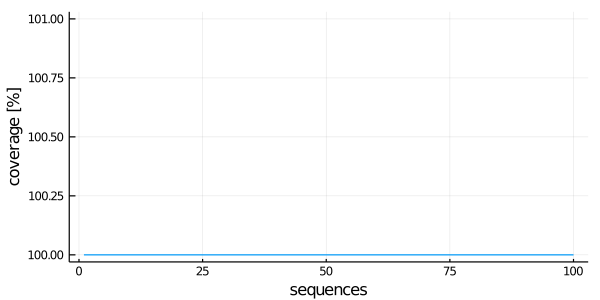

In [59]:
plot(   1:nsequences(msa), # x is a range from 1 to the number of sequences
        vec(coverage(msa)) .* 100, # y is a Vector{Float64} with the coverage of each sequence
        linetype = :line,
        ylabel = "coverage [%]",
        xlabel = "sequences",
        legend=false)

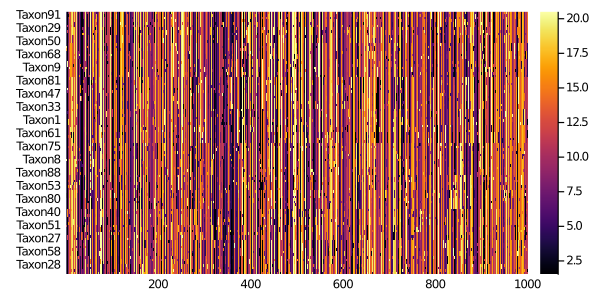

In [60]:
plot(msa)

In [61]:
println("\tsequences\tcolumns")
println( "Before:\t", nsequences(msa), "\t\t", ncolumns(msa)  )
# delete sequences with less than 90% coverage of the MSA length:
filtersequences!(msa, coverage(msa) .>= 0.9)
# delete columns with more than 10% of gaps:
filtercolumns!(msa, columngapfraction(msa) .<= 0.1)
println( "After:\t", nsequences(msa), "\t\t",  ncolumns(msa)  )

	sequences	columns
Before:	100		1000
After:	100		1000


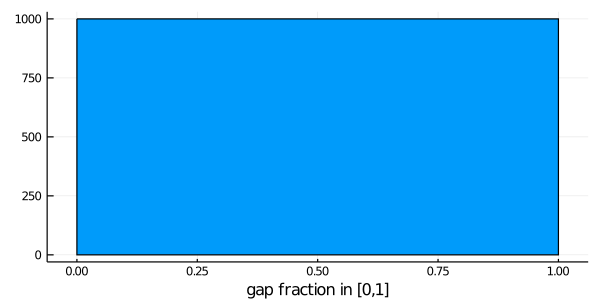

In [62]:
histogram(  vec(columngapfraction(msa)),
            # Using vec() to get a Vector{Float64} with the fraction of gaps of each column
            xlabel = "gap fraction in [0,1]", bins = 10, legend = false)

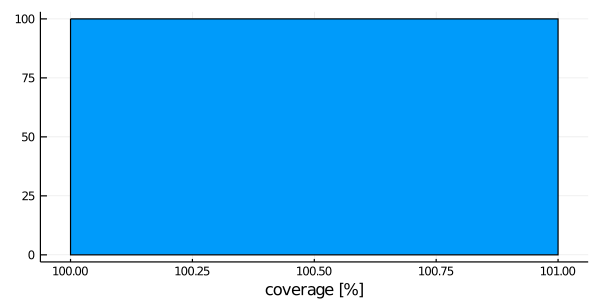

In [63]:
histogram(  vec(coverage(msa) .* 100.0), #  Column with the coverage of each sequence
            xlabel = "coverage [%]", legend=false)

In [64]:
pid = percentidentity(msa)

100×100 Named PairwiseListMatrix{Float64, false, Vector{Float64}}
Seq1 ╲ Seq2 │  Taxon91   Taxon29   Taxon50   Taxon68    Taxon9   Taxon81   Taxon47   Taxon33    Taxon1   Taxon61   Taxon75    Taxon8   Taxon88   Taxon53   Taxon80   Taxon40   Taxon51   Taxon27   Taxon58   Taxon28   Taxon66    Taxon7   Taxon46   Taxon98   Taxon76   Taxon39    Taxon2   Taxon37   Taxon52  …   Taxon15   Taxon20   Taxon69   Taxon16   Taxon86   Taxon32   Taxon17   Taxon14   Taxon83   Taxon59   Taxon94   Taxon21   Taxon57   Taxon65   Taxon77   Taxon79   Taxon64   Taxon36   Taxon13   Taxon26    Taxon3   Taxon87   Taxon48    Taxon5   Taxon97   Taxon41   Taxon44   Taxon93   Taxon96
────────────┼─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────

In [65]:
pidtable = to_table(pid, diagonal=false)

4950×3 Matrix{Any}:
 "Taxon91"  "Taxon29"  92.6
 "Taxon91"  "Taxon50"  91.8
 "Taxon91"  "Taxon68"  93.5
 "Taxon91"  "Taxon9"   88.7
 "Taxon91"  "Taxon81"  88.7
 "Taxon91"  "Taxon47"  84.1
 "Taxon91"  "Taxon33"  80.4
 "Taxon91"  "Taxon1"   79.9
 ⋮                     
 "Taxon97"  "Taxon96"  81.9
 "Taxon41"  "Taxon44"  93.0
 "Taxon41"  "Taxon93"  84.9
 "Taxon41"  "Taxon96"  83.6
 "Taxon44"  "Taxon93"  85.3
 "Taxon44"  "Taxon96"  83.7
 "Taxon93"  "Taxon96"  87.5

In [66]:
quantile(convert(Vector{Float64}, pidtable[:,3]), [0.00, 0.25, 0.50, 0.75, 1.00])

5-element Vector{Float64}:
 59.4
 66.3
 68.9
 73.4
 98.6

In [67]:
meanpercentidentity(msa)

70.54767676767672

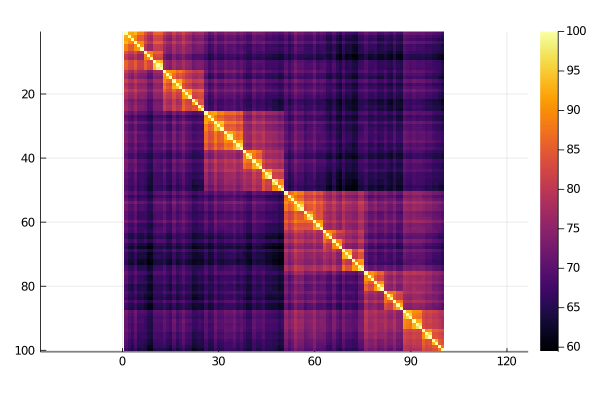

In [68]:
gr()
heatmap(convert(Matrix, pid), yflip=true, ratio=:equal)

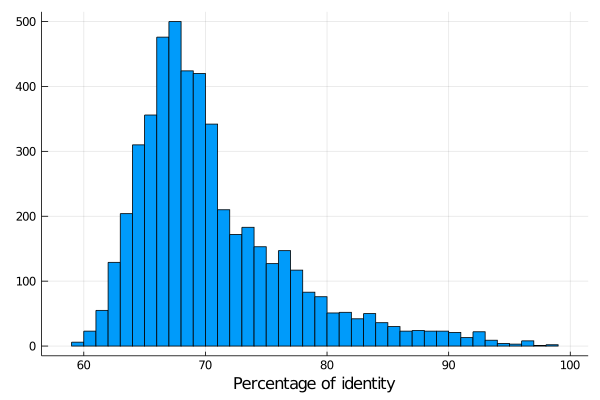

In [69]:
histogram(pidtable[:,3], xlabel ="Percentage of identity", legend=false)

In [70]:
getresidues(msa)

100×1000 Matrix{Residue}:
 W  E  V  I  F  N  G  T  H  R  N  V  R  M  N  H  R  N  Y  H  K  R  T  M  F  W  K  W  K  K  T  M  V  I  V  S  F  M  L  M  I  R  V  F  F  K  Y  I  S  W  N  A  V  T  P  V  Q  T  N  K  K  P  K  V  S  A  C  S  T  K  D  C  I  A  C  A  N  F  M  L  R  E  F  F  I  D  Y  L  I  H  L  Y  Y  H  N  R  I  L  N  …  W  Y  C  V  N  G  E  Y  R  V  H  M  L  E  Y  D  L  P  A  L  D  C  I  V  T  Y  S  I  C  D  H  E  A  I  C  D  P  R  C  Q  S  L  I  C  I  R  Y  Q  R  G  M  R  C  L  Q  D  W  L  P  R  C  T  Q  Q  K  L  L  V  G  L  C  I  C  S  I  Y  E  Q  Y  Q  N  G  Q  Y  W  T  D  E  C  H  P  D  I  G  L  P  E  R  D
 W  E  V  I  Y  N  G  T  H  R  N  V  R  A  N  H  R  N  Y  H  K  R  T  M  F  W  K  W  K  K  T  M  V  I  V  S  F  M  L  M  I  R  V  F  F  Y  Y  I  S  W  N  A  V  T  P  V  Q  C  N  K  K  P  K  V  D  A  M  S  T  K  D  C  P  A  C  A  N  F  M  L  R  E  Y  F  I  D  Y  T  I  H  L  Y  Y  H  N  R  I  L  N     W  Y  C  V  N  G  E  Y  R  V  H  M  L  E  Y  D  L  P  A  L  D  C  I  V  T  Y

In [71]:
getresiduesequences(msa)

100-element Vector{Vector{Residue}}:
 [W, E, V, I, F, N, G, T, H, R  …  H, P, D, I, G, L, P, E, R, D]
 [W, E, V, I, Y, N, G, T, H, R  …  H, P, D, I, G, L, P, E, R, D]
 [W, E, V, L, F, N, Q, T, H, R  …  H, P, D, I, G, L, P, E, R, D]
 [W, E, V, I, F, N, G, T, H, R  …  H, P, D, I, G, L, P, E, R, D]
 [W, E, V, L, F, N, G, I, H, R  …  H, P, D, I, G, L, P, E, K, D]
 [W, E, L, I, F, N, G, I, H, R  …  H, P, D, I, G, L, P, E, K, D]
 [W, E, V, V, F, N, G, T, H, R  …  H, P, D, I, G, L, P, E, R, D]
 [W, E, I, I, F, N, G, T, H, K  …  H, P, D, I, G, L, P, E, R, D]
 ⋮
 [W, E, V, I, M, N, G, T, Q, R  …  H, K, Y, I, L, L, P, I, P, D]
 [W, E, V, I, M, N, G, T, H, R  …  H, K, Y, L, L, L, P, I, P, D]
 [W, E, V, I, M, N, G, T, H, R  …  H, K, Y, L, L, L, P, I, P, D]
 [W, E, V, I, M, N, G, T, H, R  …  H, K, Y, I, A, L, P, I, P, Q]
 [W, E, V, I, M, N, G, T, H, R  …  H, K, Y, I, A, L, P, I, P, Q]
 [W, E, V, I, M, N, G, T, H, F  …  H, C, Y, I, A, I, P, V, P, D]
 [W, E, V, I, M, N, G, T, H, R  …  H, K, Y, I, A, 

In [72]:
sequencenames(msa)

100-element Vector{String}:
 "Taxon91"
 "Taxon29"
 "Taxon50"
 "Taxon68"
 "Taxon9"
 "Taxon81"
 "Taxon47"
 "Taxon33"
 ⋮
 "Taxon48"
 "Taxon5"
 "Taxon97"
 "Taxon41"
 "Taxon44"
 "Taxon93"
 "Taxon96"

## MIToS.MSA.gapstrip

Creates a new matrix of Residues (MSA) with deleted sequences and columns/positions. The MSA is edited in the following way:

Removes all the columns/position on the MSA with gaps on the reference (first) sequence
Removes all the sequences with a coverage with respect to the number of
columns/positions on the MSA less than a coveragelimit (default to 0.75: sequences with 25% of gaps)

Removes all the columns/position on the MSA with more than a gaplimit
(default to 0.5: 50% of gaps)

In [73]:
msa1 = MIToS.MSA.gapstrip(msa,gaplimit=0.65)

AnnotatedMultipleSequenceAlignment with 102 annotations : 100×1000 Named Matrix{Residue}
Seq ╲ Col │    1     2     3     4     5     6     7     8     9    10    11    12    13    14    15    16    17    18    19    20    21    22    23    24    25    26    27    28    29    30    31    32    33    34    35    36    37    38    39    40    41    42    43    44    45    46    47    48  …   953   954   955   956   957   958   959   960   961   962   963   964   965   966   967   968   969   970   971   972   973   974   975   976   977   978   979   980   981   982   983   984   985   986   987   988   989   990   991   992   993   994   995   996   997   998   999  1000
──────────┼──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────

In [74]:
residues = getresidues(msa1) # estimateincolumns functions take a Matrix{Residue}

100×1000 Matrix{Residue}:
 W  E  V  I  F  N  G  T  H  R  N  V  R  M  N  H  R  N  Y  H  K  R  T  M  F  W  K  W  K  K  T  M  V  I  V  S  F  M  L  M  I  R  V  F  F  K  Y  I  S  W  N  A  V  T  P  V  Q  T  N  K  K  P  K  V  S  A  C  S  T  K  D  C  I  A  C  A  N  F  M  L  R  E  F  F  I  D  Y  L  I  H  L  Y  Y  H  N  R  I  L  N  …  W  Y  C  V  N  G  E  Y  R  V  H  M  L  E  Y  D  L  P  A  L  D  C  I  V  T  Y  S  I  C  D  H  E  A  I  C  D  P  R  C  Q  S  L  I  C  I  R  Y  Q  R  G  M  R  C  L  Q  D  W  L  P  R  C  T  Q  Q  K  L  L  V  G  L  C  I  C  S  I  Y  E  Q  Y  Q  N  G  Q  Y  W  T  D  E  C  H  P  D  I  G  L  P  E  R  D
 W  E  V  I  Y  N  G  T  H  R  N  V  R  A  N  H  R  N  Y  H  K  R  T  M  F  W  K  W  K  K  T  M  V  I  V  S  F  M  L  M  I  R  V  F  F  Y  Y  I  S  W  N  A  V  T  P  V  Q  C  N  K  K  P  K  V  D  A  M  S  T  K  D  C  P  A  C  A  N  F  M  L  R  E  Y  F  I  D  Y  T  I  H  L  Y  Y  H  N  R  I  L  N     W  Y  C  V  N  G  E  Y  R  V  H  M  L  E  Y  D  L  P  A  L  D  C  I  V  T  Y

## Count residues to estimate the entropy. 
The entropy estimation is performed over a rehused Counts object. The result will be a vector containing the values estimated over each column without counting gaps (UngappedAlphabet).

In [75]:

Hx = mapcolfreq!(entropy, msa, Counts(ContingencyTable(Float64, Val{1}, UngappedAlphabet())))

1×1000 Named Matrix{Float64}
Function ╲ Col │         1          2          3          4          5          6          7          8          9         10         11         12         13         14         15         16         17         18         19         20         21         22         23         24         25         26  …        975        976        977        978        979        980        981        982        983        984        985        986        987        988        989        990        991        992        993        994        995        996        997        998        999       1000
───────────────┼────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────

In [76]:
#Hxy = mapcolpairfreq!(entropy, msa1, Counts(ContingencyTable(Float64, Val{2}, UngappedAlphabet())))

In [77]:
NMIxy = mapcolpairfreq!(normalized_mutual_information, msa1, Counts(ContingencyTable(Float64, Val{2}, GappedAlphabet())), Val{false})

1000×1000 Named PairwiseListMatrix{Float64, false, Vector{Float64}}
Col1 ╲ Col2 │           1            2            3            4            5            6            7            8            9           10           11           12           13           14           15           16           17           18           19           20           21           22  …          979          980          981          982          983          984          985          986          987          988          989          990          991          992          993          994          995          996          997          998          999         1000
────────────┼───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────

In [78]:
NMIxy_transpose = mapcolpairfreq!(normalized_mutual_information, transpose(msa1), Counts(ContingencyTable(Float64, Val{2}, GappedAlphabet())), Val{false})

100×100 Named PairwiseListMatrix{Float64, false, Vector{Float64}}
Col1 ╲ Col2 │  Taxon91   Taxon29   Taxon50   Taxon68    Taxon9   Taxon81   Taxon47   Taxon33    Taxon1   Taxon61   Taxon75    Taxon8   Taxon88   Taxon53   Taxon80   Taxon40   Taxon51   Taxon27   Taxon58   Taxon28   Taxon66    Taxon7   Taxon46   Taxon98   Taxon76   Taxon39    Taxon2   Taxon37   Taxon52  …   Taxon15   Taxon20   Taxon69   Taxon16   Taxon86   Taxon32   Taxon17   Taxon14   Taxon83   Taxon59   Taxon94   Taxon21   Taxon57   Taxon65   Taxon77   Taxon79   Taxon64   Taxon36   Taxon13   Taxon26    Taxon3   Taxon87   Taxon48    Taxon5   Taxon97   Taxon41   Taxon44   Taxon93   Taxon96
────────────┼─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────

In [79]:
NMI_matrix_t = convert(Matrix{Float64}, NMIxy_transpose.array)

100×100 Matrix{Float64}:
 0.0       0.795608  0.773682  0.815954  0.710857  0.705687  0.616798  0.558246  0.547524  0.656032  0.654676  0.646139  0.565108  0.528779  0.51733   0.578988  0.53501   0.544669  0.584702  0.539631  0.52771   0.48777   0.498999  0.511049  0.517257  0.467481  0.426047  0.440188  0.480559  0.44429   …  0.374589  0.370971  0.404123  0.406802  0.433411  0.412921  0.408628  0.424284  0.394484  0.399417  0.413701  0.404109  0.395308  0.421585  0.391363  0.386795  0.455699  0.442462  0.438745  0.438514  0.435746  0.436089  0.437556  0.414352  0.420386  0.415831  0.409973  0.401506  0.390298
 0.795608  0.0       0.766799  0.729953  0.639238  0.636381  0.564712  0.52392   0.507516  0.601553  0.598369  0.589749  0.521167  0.489086  0.480842  0.539528  0.496596  0.506637  0.545089  0.506512  0.494956  0.457351  0.47171   0.473488  0.479291  0.440211  0.406008  0.41377   0.448076  0.419033     0.349922  0.346875  0.379737  0.378691  0.402158  0.385071  0.377402  0.390497

In [80]:
num_cluster = 5

5

In [81]:
# cluster X into 20 clusters using K-means 
KClusters = kmeans(NMI_matrix_t, num_cluster; maxiter = 100,  
                                display=:iter)

  Iters               objv        objv-change | affected 
-------------------------------------------------------------
      0       9.945440e+01
      1       5.252175e+01      -4.693265e+01 |        4
      2       5.208876e+01      -4.329855e-01 |        0
      3       5.208876e+01       0.000000e+00 |        0
K-means converged with 3 iterations (objv = 52.08876466816851)


KmeansResult{Matrix{Float64}, Float64, Int64}([0.44657770892678395 0.411575187020808 … 0.5693278202374135 0.41692649958750944; 0.42008733878086063 0.3843253031665634 … 0.5285947186462876 0.3918410410673521; … ; 0.3801418933540362 0.4145455162358779 … 0.38060544550337705 0.5002051759747155; 0.37097690023381025 0.4044771429494325 … 0.3665766214926344 0.48915066966716947], [4, 4, 3, 4, 3, 4, 3, 3, 3, 3  …  5, 5, 5, 5, 5, 5, 5, 5, 5, 5], [0.6788126860056849, 0.4779145825011568, 0.40024351381423884, 0.5978548697417381, 0.36703639824460765, 0.44926779974303344, 0.4455100709843336, 0.4758089586529124, 0.4805950667640637, 0.5171778310841049  …  0.5902439950110718, 0.6173583683866681, 0.6207282419269831, 0.47722609610146804, 0.49005246554665405, 0.5132019855379468, 0.4342518286287884, 0.443689802875852, 0.3855274785276208, 0.4042331033338371], [25, 25, 10, 15, 25], [25, 25, 10, 15, 25], 52.08876466816851, 3, true)

In [82]:
# verify the number of clusters 
nclusters(KClusters) == 1

false

In [83]:
# get the assignments of points to clusters 
cluster_assignment = assignments(KClusters) 

100-element Vector{Int64}:
 4
 4
 3
 4
 3
 4
 3
 3
 ⋮
 5
 5
 5
 5
 5
 5
 5

In [84]:
# get the cluster sizes 
cnt = counts(KClusters) 

5-element Vector{Int64}:
 25
 25
 10
 15
 25

In [85]:
# get the cluster centers 
Cluster_Center = KClusters.centers 

100×5 Matrix{Float64}:
 0.446578  0.411575  0.587829  0.569328  0.416926
 0.420087  0.384325  0.548713  0.528595  0.391841
 0.410883  0.377695  0.461416  0.568443  0.37859
 0.437788  0.402883  0.576622  0.558801  0.406848
 0.402162  0.369553  0.455484  0.562045  0.376188
 0.405779  0.372206  0.5299    0.506302  0.379291
 0.396279  0.367505  0.493729  0.527106  0.363419
 0.373401  0.343412  0.466798  0.482257  0.342448
 ⋮                                       
 0.405487  0.451124  0.381082  0.411562  0.543546
 0.393661  0.43435   0.365803  0.393207  0.527978
 0.398835  0.439236  0.370712  0.399017  0.533893
 0.387583  0.425899  0.366011  0.3913    0.514563
 0.384497  0.420606  0.362286  0.387426  0.514251
 0.380142  0.414546  0.352585  0.380605  0.500205
 0.370977  0.404477  0.342433  0.366577  0.489151

In [86]:
df = DataFrame( seqnum = 1:nsequences(msa1),
                seqname = sequencenames(msa1),
                cluster = cluster_assignment, # the cluster number/index of each sequence
                coverage = vec(coverage(msa1)))

first(df, 20)

20×4 DataFrame
│ Row │ seqnum │ seqname │ cluster │ coverage │
│     │ Int64  │ String  │ Int64   │ Float64  │
├─────┼────────┼─────────┼─────────┼──────────┤
│ 1   │ 1      │ Taxon91 │ 4       │ 1.0      │
│ 2   │ 2      │ Taxon29 │ 4       │ 1.0      │
│ 3   │ 3      │ Taxon50 │ 3       │ 1.0      │
│ 4   │ 4      │ Taxon68 │ 4       │ 1.0      │
│ 5   │ 5      │ Taxon9  │ 3       │ 1.0      │
⋮
│ 15  │ 15     │ Taxon80 │ 3       │ 1.0      │
│ 16  │ 16     │ Taxon40 │ 4       │ 1.0      │
│ 17  │ 17     │ Taxon51 │ 4       │ 1.0      │
│ 18  │ 18     │ Taxon27 │ 4       │ 1.0      │
│ 19  │ 19     │ Taxon58 │ 4       │ 1.0      │
│ 20  │ 20     │ Taxon28 │ 4       │ 1.0      │

In [87]:
# Group by clusters and calculate summary statistics
top_clusters = combine(
    groupby(df, :cluster),
    :seqnum => length => :n_sequences,
    :coverage => mean => :mean_coverage
)

# Display the top clusters
first(top_clusters, 20)  # Display the top 10 clusters


5×3 DataFrame
│ Row │ cluster │ n_sequences │ mean_coverage │
│     │ Int64   │ Int64       │ Float64       │
├─────┼─────────┼─────────────┼───────────────┤
│ 1   │ 4       │ 15          │ 1.0           │
│ 2   │ 3       │ 10          │ 1.0           │
│ 3   │ 1       │ 25          │ 1.0           │
│ 4   │ 2       │ 25          │ 1.0           │
│ 5   │ 5       │ 25          │ 1.0           │

In [88]:
# Assuming you already have the df DataFrame with the specified columns
df_filtered = filter(row -> row.cluster > 1, df)

first(df_filtered, 20)

20×4 DataFrame
│ Row │ seqnum │ seqname │ cluster │ coverage │
│     │ Int64  │ String  │ Int64   │ Float64  │
├─────┼────────┼─────────┼─────────┼──────────┤
│ 1   │ 1      │ Taxon91 │ 4       │ 1.0      │
│ 2   │ 2      │ Taxon29 │ 4       │ 1.0      │
│ 3   │ 3      │ Taxon50 │ 3       │ 1.0      │
│ 4   │ 4      │ Taxon68 │ 4       │ 1.0      │
│ 5   │ 5      │ Taxon9  │ 3       │ 1.0      │
⋮
│ 15  │ 15     │ Taxon80 │ 3       │ 1.0      │
│ 16  │ 16     │ Taxon40 │ 4       │ 1.0      │
│ 17  │ 17     │ Taxon51 │ 4       │ 1.0      │
│ 18  │ 18     │ Taxon27 │ 4       │ 1.0      │
│ 19  │ 19     │ Taxon58 │ 4       │ 1.0      │
│ 20  │ 20     │ Taxon28 │ 4       │ 1.0      │

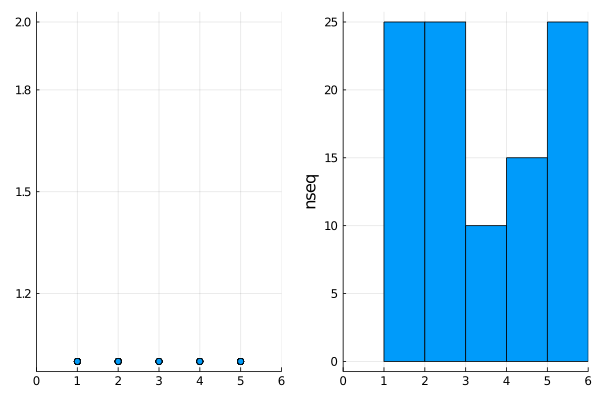

In [89]:
h = @df df histogram(:cluster, ylabel="nseq")
p = @df df plot(:cluster, :coverage, linetype=:scatter)
plot(p, h, nc=1, xlim=(0, nclusters(KClusters)+1 ), legend=false)

In [90]:
maxcoverage = by(df, :cluster, cl -> cl[ findmax(cl[:coverage])[2] ,
                 [:seqnum, :seqname, :coverage]])

first(maxcoverage, 200)

5×4 DataFrame
│ Row │ cluster │ seqnum │ seqname │ coverage │
│     │ Int64   │ Int64  │ String  │ Float64  │
├─────┼─────────┼────────┼─────────┼──────────┤
│ 1   │ 4       │ 1      │ Taxon91 │ 1.0      │
│ 2   │ 3       │ 3      │ Taxon50 │ 1.0      │
│ 3   │ 1       │ 26     │ Taxon39 │ 1.0      │
│ 4   │ 2       │ 51     │ Taxon23 │ 1.0      │
│ 5   │ 5       │ 76     │ Taxon86 │ 1.0      │

### We use the Split-Apply-Combine strategy, though the by function of the DataFrames package, to select the sequence of highest coverage for each cluster.

In [91]:
p = @df maxcoverage plot(:cluster, :coverage, linetype=:scatter)
h = @df maxcoverage histogram(:cluster, ylabel="nseq")
plot(p, h, nc=1, xlim=(0, nclusters(KClusters)+1 ), legend=false)
png("msa_clusters_iii.png") # hide
nothing # hide

### We can easily generate a mask using list comprehension, to select only the representative sequences of the MSA (deleting the rest of the sequences with filtersequences!).

In [92]:
cluster_references = Bool[ seqnum in maxcoverage[:seqnum] for seqnum in 1:nsequences(msa1) ]

100-element Vector{Bool}:
 1
 0
 1
 0
 0
 0
 0
 0
 ⋮
 0
 0
 0
 0
 0
 0
 0

In [93]:
filtersequences!(msa1, cluster_references)

AnnotatedMultipleSequenceAlignment with 8 annotations : 5×1000 Named Matrix{Residue}
Seq ╲ Col │    1     2     3     4     5     6     7     8     9    10    11    12    13    14    15    16    17    18    19    20    21    22    23    24    25    26    27    28    29    30    31    32    33    34    35    36    37    38    39    40    41    42    43    44    45    46    47    48  …   953   954   955   956   957   958   959   960   961   962   963   964   965   966   967   968   969   970   971   972   973   974   975   976   977   978   979   980   981   982   983   984   985   986   987   988   989   990   991   992   993   994   995   996   997   998   999  1000
──────────┼──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────

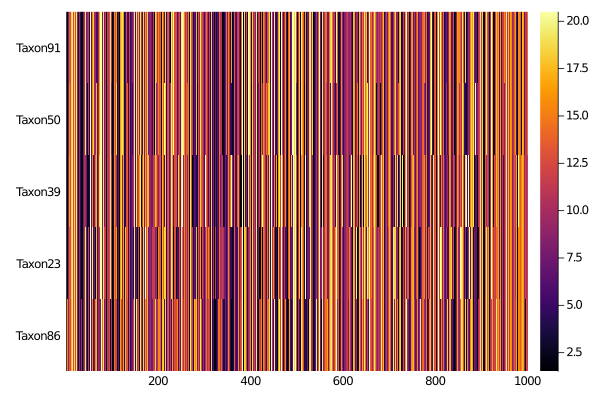

In [94]:
plot(msa1)

In [95]:
using Plots

sum(KClusters.assignments.==5)

25

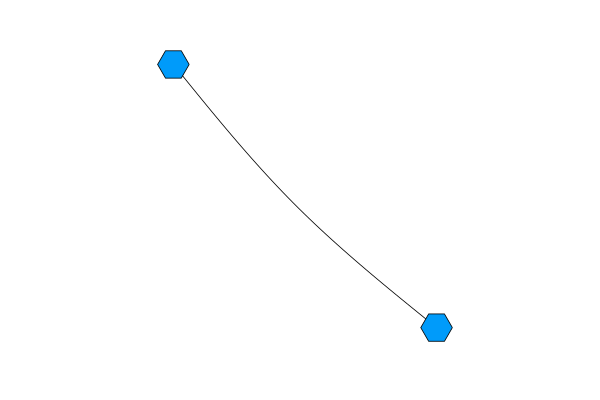

In [96]:
using GraphRecipes

graphplot(NMI_matrix_t[1:2,1:2])

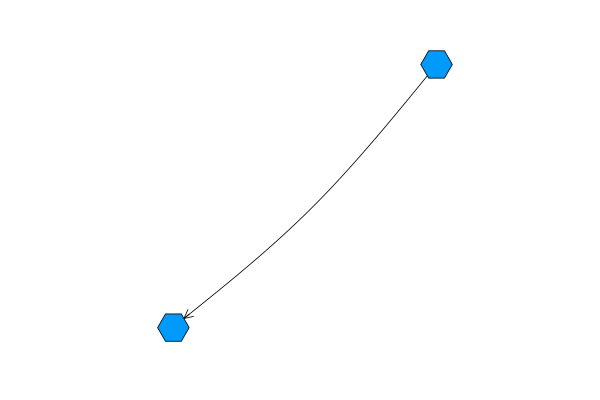

In [97]:
graphplot(UpperTriangular(NMI_matrix_t[1:2,1:2]))

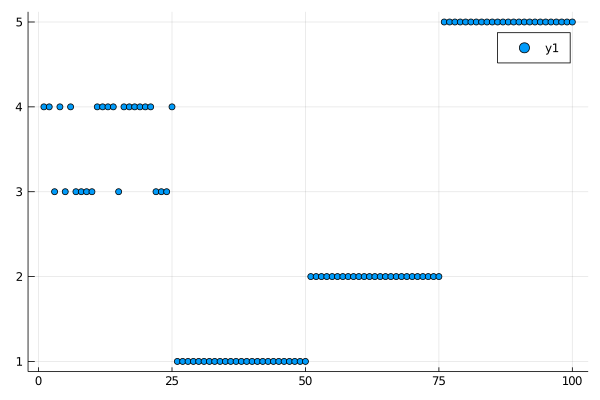

In [98]:
scatter(KClusters.assignments)

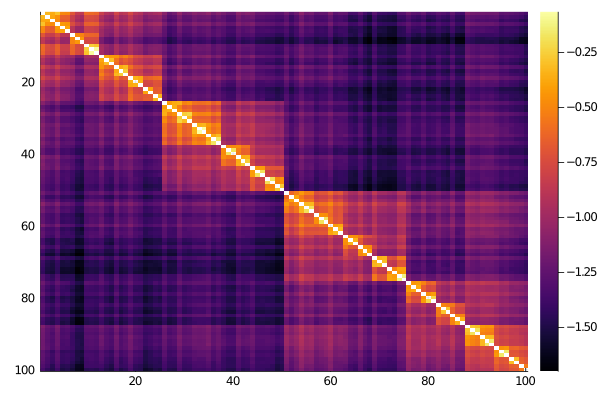

In [99]:
heatmap(log2.(NMI_matrix_t), yflip=true)

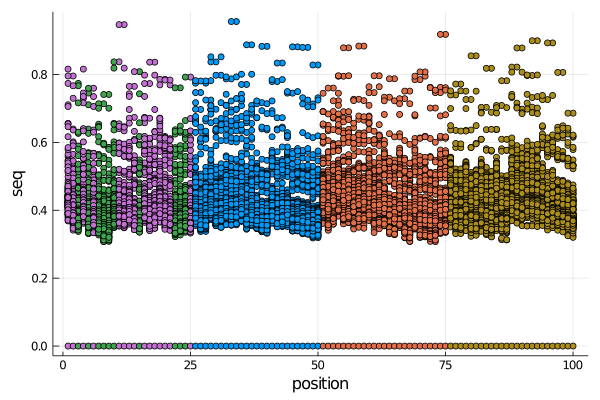

In [100]:
# Create a scatter plot
scatter(1:size(NMI_matrix_t, 2), NMI_matrix_t, color=cluster_assignment, legend=false)
xlabel!("position")
ylabel!("seq")



### Principal Component Analysis (PCA) Plot
Since the data has a high dimension, we can use PCA to reduce it to a few principal components and then plot the clusters.

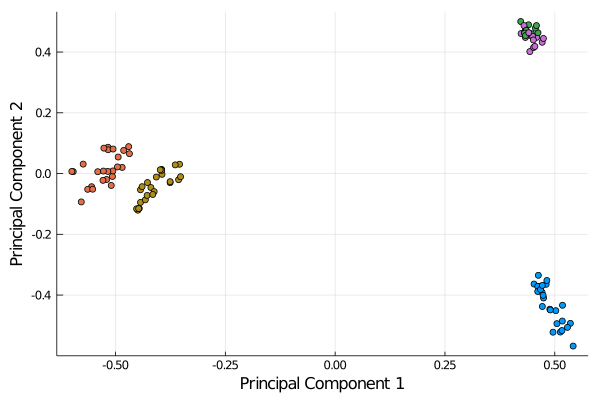

In [101]:
using MultivariateStats

# Perform PCA
pca_result = fit(PCA, NMI_matrix_t', maxoutdim=2)
pca_data = MultivariateStats.transform(pca_result, NMI_matrix_t')

# Create a PCA plot
scatter(pca_data[1, :], pca_data[2, :], color=cluster_assignment, legend=false)
xlabel!("Principal Component 1")
ylabel!("Principal Component 2")

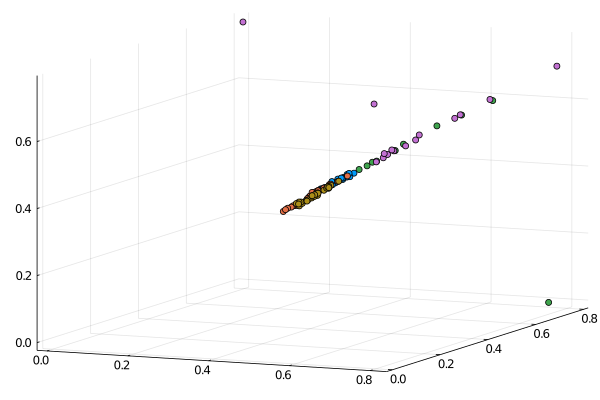

In [102]:
scatter3d(NMI_matrix_t[1, :], NMI_matrix_t[2, :], NMI_matrix_t[3, :], color=cluster_assignment, legend=false)
